In [93]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')
import pandas_ta as ta

In [94]:
import requests
from requests_html import HTMLSession
session = HTMLSession()
num_currencies=250
resp = session.get(f"https://finance.yahoo.com/crypto?offset=0&count={num_currencies}")
tables = pd.read_html(resp.html.raw_html)               
df = tables[0].copy()
symbols_yf = df.Symbol.tolist()
print(symbols_yf[:15])
print(df.head(5))

['BTC-USD', 'ETH-USD', 'USDT-USD', 'ACCEL-USD', 'BNB-USD', 'USDC-USD', 'XRP-USD', 'BUSD-USD', 'ADA-USD', 'DOGE-USD', 'MATIC-USD', 'SOL-USD', 'DOT-USD', 'LTC-USD', 'SHIB-USD']
      Symbol          Name  Price (Intraday)    Change        % Change  \
0    BTC-USD   Bitcoin USD          22923.80 -168.0400          -0.73%   
1    ETH-USD  Ethereum USD           1575.51   -3.4800          -0.22%   
2   USDT-USD    Tether USD              1.00   -0.0001          -0.01%   
3  ACCEL-USD     ACCEL USD            260.89  260.8800  +2,148,227.34%   
4    BNB-USD       BNB USD            310.82    4.1600          +1.36%   

  Market Cap Volume in Currency (Since 0:00 UTC) Volume in Currency (24Hr)  \
0   441.921B                             22.802B                   22.802B   
1   192.802B                              7.334B                    7.334B   
2    67.812B                             32.126B                   32.126B   
3    49.291B                                 319                    

In [95]:
# print all symbols that's market cap is in bottom 50%
df.sort_values(by=['Market Cap'], inplace=True)
df.reset_index(drop=True, inplace=True)
print(df.head(5))
symbols_yf = df.Symbol.tolist()
print(symbols_yf)




         Symbol               Name  Price (Intraday)    Change % Change  \
0     THETA-USD  Theta Network USD          1.015200 -0.029600   -2.83%   
1      FRAX-USD           Frax USD          0.999394  0.000993   +0.10%   
2      FLOW-USD           Flow USD          0.999801 -0.020373   -2.00%   
3      LUNC-USD  Terra Classic USD          0.000174  0.000006   +3.52%   
4  BIT11221-USD         BitDAO USD          0.507493 -0.042161   -7.67%   

  Market Cap Volume in Currency (Since 0:00 UTC) Volume in Currency (24Hr)  \
0     1.015B                             25.168M                   25.168M   
1     1.023B                              9.941M                    9.941M   
2     1.036B                             55.082M                   55.082M   
3     1.041B                            108.723M                  108.723M   
4     1.061B                                 47M                       47M   

  Total Volume All Currencies (24Hr) Circulating Supply  52 Week Range  \
0     

In [96]:
# download ethereum data from yfinance
eth = yf.download('THETA-USD', period='max', interval='1d')

# convert to pandas dataframe
eth = pd.DataFrame(eth)




[*********************100%***********************]  1 of 1 completed


In [97]:
list = ["above_value", "accbands", "ad", "adosc", "adx",\
    "amat", "aobv", "apo", "aroon", "atr", "bbands", \
    "below_value", "bias", "bop", "brar", "cci", "cdl_z", \
    "cfo", "cg", "chop", "cksp", "cmf", "cmo", "coppock", \
    "cross_value", "cti", "decay", "decreasing", "dema", "dm", "donchian", \
    "ebsw", "efi", "ema", "entropy", "eom", "er", "eri", "fisher", "fwma", "ha", \
     "hl2", "hlc3", "hma", "hwc", "hwma", "increasing", "inertia", \
    "jma", "kama", "kc", "kdj", "kst", "kurtosis", "kvo", "linreg", "log_return", \
    "long_run", "macd", "mad", "massi", "mcgd", "median", "mfi", "midpoint", \
    "midprice", "mom", "natr", "nvi", "obv", "ohlc4", "pdist", "percent_return", \
    "pgo", "ppo", "psl", "pvi", "pvo", "pvol", "pvr", "pvt", "pwma", \
    "qstick", "quantile", "rma", "roc", "rsi", "rsx", "rvgi", "rvi", "short_run", \
    "sinwma", "skew", "slope", "sma", "smi", "squeeze", "squeeze_pro", "ssf", "stc", \
    "stdev", "stoch", "stochrsi", "swma", "t3", "tema", "thermo", \
    "tos_stdevall", "trima", "trix", "true_range", "tsi", "tsignals", "ttm_trend", "ui", \
    "uo", "variance", "vhf", "vidya", "vortex", "vwap", "vwma", "wcp", "willr", \
    "wma", "xsignals", "zlma", "zscore"]

best_indicators = []
len_eth = len(eth)
first_date = eth.index[0]
i = 0
for item in list:
    print("indicator: ", item)
    temp = eth.copy()
    temp = eval(f"temp.ta.{item}(inplace=True)")
    temp.dropna(inplace=True)
    print(temp.head())
    print(len(temp))
    date_now = temp.index[0]
    difference_len = len_eth - len(temp)
    # compare how many days between first_date and date_now
    delta = date_now - first_date
    difference_days = delta.days
    if difference_days > 200:
        print("over 200 days gone")
        break
    if difference_days != difference_len:
        print(difference_days, difference_len)
        break
    best_indicators.append(item)
    i += 1
print("best_indicators: ", best_indicators)
for item in best_indicators:
    print("Indicator: ", item)
    temp = eval(f"eth.ta.{item}()")
    # add temp to eth
    eth = eth.join(temp, how="outer", rsuffix=f"_{item}")

print("len eth: ", len(eth))
print(eth.head())
eth.dropna(inplace=True)
print("len eth: ", len(eth))

# make all values pct_change unless they are categorical
eth = eth.pct_change()

eth.head()

indicator:  above_value
[X] value is not a number
                Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2018-01-17  0.153987  0.196066  0.150681  0.183236   0.183236  10023000
2018-01-18  0.183493  0.237408  0.171234  0.195550   0.195550   8838400
2018-01-19  0.194234  0.199895  0.152238  0.180431   0.180431   6949030
2018-01-20  0.181328  0.191841  0.174591  0.189888   0.189888   8285020
2018-01-21  0.189285  0.190032  0.153868  0.165060   0.165060   5526050
1841
indicator:  accbands
            ACCBL_20  ACCBM_20  ACCBU_20
Date                                    
2018-02-05  0.087159  0.206299  0.351743
2018-02-06  0.085033  0.203992  0.348436
2018-02-07  0.085716  0.200293  0.339082
2018-02-08  0.086771  0.197767  0.332399
2018-02-09  0.083147  0.195376  0.331462
1822
indicator:  ad
Date
2018-01-17    4.356144e+06
2018-01-18    2.013181e+06
2018-01-19    3.285986e+06
2018-01-20    9.694984e+06


,Open,High,Low,Close,Adj Close,Volume,Open_above_value,High_above_value,Low_above_value,Close_above_value,...,VIDYA_14_xsignals,VTXP_14_xsignals,VTXM_14_xsignals,VWAP_D_xsignals,VWMA_10_xsignals,WCP_xsignals,WILLR_14_xsignals,WMA_10_xsignals,ZL_EMA_10,ZS_30
Date,,,,,,,,,,,,,,,,,,,,,
2018-04-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-24,-0.017424,0.028634,0.014442,0.067805,0.067805,0.306865,-0.017424,0.028634,0.014442,0.067805,...,0.023589,-0.001940,-0.023766,0.037018,0.032177,0.044670,-0.701815,0.034500,0.028425,0.260877
2018-04-25,0.070582,-0.013221,-0.148184,-0.186939,-0.186939,-0.133123,0.070582,-0.013221,-0.148184,-0.186939,...,0.000161,-0.115392,0.095585,-0.114912,-0.000205,-0.133210,7.966461,-0.009136,-0.048234,-0.802736
2018-04-26,-0.180708,-0.072763,0.002886,0.130641,0.130641,-0.229911,-0.180708,-0.072763,0.002886,0.130641,...,0.003642,-0.014277,0.131947,0.013814,0.019113,0.041654,-0.462540,0.011731,-0.007209,2.128322
2018-04-27,0.124654,-0.006273,0.065709,-0.083684,-0.083684,-0.222093,0.124654,-0.006273,0.065709,-0.083684,...,0.000406,-0.024712,0.057546,-0.011688,0.010837,-0.030310,0.726821,-0.007554,-0.033840,-0.522194


In [98]:
# change inf to 0
eth = eth.replace([np.inf, -np.inf], 0)

# add a column for day of the week
eth['day_of_week'] = eth.index.dayofweek

eth.head()

,Open,High,Low,Close,Adj Close,Volume,Open_above_value,High_above_value,Low_above_value,Close_above_value,...,VTXP_14_xsignals,VTXM_14_xsignals,VWAP_D_xsignals,VWMA_10_xsignals,WCP_xsignals,WILLR_14_xsignals,WMA_10_xsignals,ZL_EMA_10,ZS_30,day_of_week
Date,,,,,,,,,,,,,,,,,,,,,
2018-04-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2018-04-24,-0.017424,0.028634,0.014442,0.067805,0.067805,0.306865,-0.017424,0.028634,0.014442,0.067805,...,-0.001940,-0.023766,0.037018,0.032177,0.044670,-0.701815,0.034500,0.028425,0.260877,1
2018-04-25,0.070582,-0.013221,-0.148184,-0.186939,-0.186939,-0.133123,0.070582,-0.013221,-0.148184,-0.186939,...,-0.115392,0.095585,-0.114912,-0.000205,-0.133210,7.966461,-0.009136,-0.048234,-0.802736,2
2018-04-26,-0.180708,-0.072763,0.002886,0.130641,0.130641,-0.229911,-0.180708,-0.072763,0.002886,0.130641,...,-0.014277,0.131947,0.013814,0.019113,0.041654,-0.462540,0.011731,-0.007209,2.128322,3
2018-04-27,0.124654,-0.006273,0.065709,-0.083684,-0.083684,-0.222093,0.124654,-0.006273,0.065709,-0.083684,...,-0.024712,0.057546,-0.011688,0.010837,-0.030310,0.726821,-0.007554,-0.033840,-0.522194,4


In [99]:
i = 0
# check what columns have nan values
for col in eth.columns:
    na = eth[col].isna().sum()
    if na > 10:
        i += 1
        eth = eth.drop([col], axis=1)
eth.head()

,Open,High,Low,Close,Adj Close,Volume,Open_above_value,High_above_value,Low_above_value,Close_above_value,...,VTXP_14_xsignals,VTXM_14_xsignals,VWAP_D_xsignals,VWMA_10_xsignals,WCP_xsignals,WILLR_14_xsignals,WMA_10_xsignals,ZL_EMA_10,ZS_30,day_of_week
Date,,,,,,,,,,,,,,,,,,,,,
2018-04-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2018-04-24,-0.017424,0.028634,0.014442,0.067805,0.067805,0.306865,-0.017424,0.028634,0.014442,0.067805,...,-0.001940,-0.023766,0.037018,0.032177,0.044670,-0.701815,0.034500,0.028425,0.260877,1
2018-04-25,0.070582,-0.013221,-0.148184,-0.186939,-0.186939,-0.133123,0.070582,-0.013221,-0.148184,-0.186939,...,-0.115392,0.095585,-0.114912,-0.000205,-0.133210,7.966461,-0.009136,-0.048234,-0.802736,2
2018-04-26,-0.180708,-0.072763,0.002886,0.130641,0.130641,-0.229911,-0.180708,-0.072763,0.002886,0.130641,...,-0.014277,0.131947,0.013814,0.019113,0.041654,-0.462540,0.011731,-0.007209,2.128322,3
2018-04-27,0.124654,-0.006273,0.065709,-0.083684,-0.083684,-0.222093,0.124654,-0.006273,0.065709,-0.083684,...,-0.024712,0.057546,-0.011688,0.010837,-0.030310,0.726821,-0.007554,-0.033840,-0.522194,4


In [100]:
# make the target close 1 if its less than 0 and 0 if its greater than 0
eth['target_close'] = np.where(eth['Close'] < 0, 1, 0)

# shift it once
eth['target_close'] = eth['target_close'].shift(-1)

eth.dropna(inplace=True)

eth.head()

,Open,High,Low,Close,Adj Close,Volume,Open_above_value,High_above_value,Low_above_value,Close_above_value,...,VTXM_14_xsignals,VWAP_D_xsignals,VWMA_10_xsignals,WCP_xsignals,WILLR_14_xsignals,WMA_10_xsignals,ZL_EMA_10,ZS_30,day_of_week,target_close
Date,,,,,,,,,,,,,,,,,,,,,
2018-04-24,-0.017424,0.028634,0.014442,0.067805,0.067805,0.306865,-0.017424,0.028634,0.014442,0.067805,...,-0.023766,0.037018,0.032177,0.044670,-0.701815,0.034500,0.028425,0.260877,1,1.0
2018-04-25,0.070582,-0.013221,-0.148184,-0.186939,-0.186939,-0.133123,0.070582,-0.013221,-0.148184,-0.186939,...,0.095585,-0.114912,-0.000205,-0.133210,7.966461,-0.009136,-0.048234,-0.802736,2,0.0
2018-04-26,-0.180708,-0.072763,0.002886,0.130641,0.130641,-0.229911,-0.180708,-0.072763,0.002886,0.130641,...,0.131947,0.013814,0.019113,0.041654,-0.462540,0.011731,-0.007209,2.128322,3,1.0
2018-04-27,0.124654,-0.006273,0.065709,-0.083684,-0.083684,-0.222093,0.124654,-0.006273,0.065709,-0.083684,...,0.057546,-0.011688,0.010837,-0.030310,0.726821,-0.007554,-0.033840,-0.522194,4,0.0
2018-04-28,-0.095029,-0.003654,-0.019499,0.068897,0.068897,0.101195,-0.095029,-0.003654,-0.019499,0.068897,...,-0.037110,0.014690,0.009889,0.027939,-0.317528,0.001867,-0.017896,0.702008,5,0.0


In [101]:
# split the data with built-in function train_test_split
from sklearn.model_selection import train_test_split

X = eth.drop('Close', axis=1)
y = eth['target_close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# convert the scaled data to dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)


<AxesSubplot:>

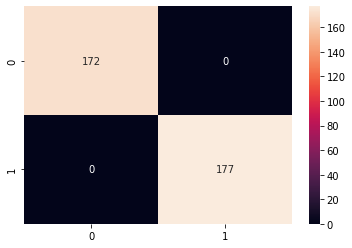

In [102]:
# lightgbm classifier
import lightgbm as lgb

# create the model
model = lgb.LGBMClassifier()

# fit the model
model.fit(X_train_scaled, y_train)

# predict the model
y_pred = model.predict(X_test_scaled)

# check the accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

# check the confusion matrix
from sklearn.metrics import confusion_matrix

# pretty print the confusion matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")



In [103]:
# check the classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       172
         1.0       1.00      1.00      1.00       177

    accuracy                           1.00       349
   macro avg       1.00      1.00      1.00       349
weighted avg       1.00      1.00      1.00       349

